# **랜덤 포레스트(Ramdom Forests)**
* **작성자:** (이형돈)

---
## **논문: Random Forests(2001)**


앙상블(ensemble)기법은 여러개의 모델을 합쳐서 더 강력한 하나의 모델을 만드는 것이다. 배깅, 랜덤 분할 선택, 랜덤 서브스페이스같이 무작위성으로 앙상블 기법을 활용하는 주요 방법들이 있다. 이 중에서도 특히 데이터를 무작위로 뽑는 배깅과 변수를 무작로 선택하는 랜덤 스페이스의 장점을 합친 것이 랜덤 포레스트다.

랜덤 포레스트는 의사결정나무들의 모음으로 구성되어있다. $h(x,\Theta_{k})$는 무작위 규칙에 따라 만들어진 k번째 나무를 의미한다. 여기서 $\Theta_{k}$들은 독립적이며 동일한 분포를 따르는 랜덤 벡터이다. 이렇게 각기 다른 개성을 가진 나무들의 결과를 투표한 후 가장 많은 표를 받은 결과를 최종값으로 결정한다.

$$
mg(X,Y) = \underset{k}{\text{av}} I(h_k(X)=Y) - \max_{j \ne Y} \underset{k}{\text{av}} I(h_k(X)=j)
$$
랜덤포레스트의 정확성을 판단할 때는 마진 함수를 이용할 수 있다.
 마진 함수는 정답이 받은 평균 득표율과 가장 강력한 오답이 받은 평균 득표율의 차이를 계산하는 식이다. 마진이 클수록 예측의 정확도가 높아진다.

랜덤포레스트는 나무가 많아져도 과적합 문제가 발생하지 않는다. 나무가 많아지면 대수의 법칙에 의해 특정 데이터에 대한 평균 득표율이 안정적인 값으로 수렴하여 결과를 신뢰할 수 있게된다.

위의 마진 개념으로 랜덤 포레스트의 성능이 결정되는 방식을 이해할 수 있다. 랜덤 포레스트의 성능은 개별 나무들의 강점이 강할수록, 그리고 나무들 간의 상관관계가 낮을 수록 좋아진다. 강점($s$)이란 데이터셋 전체에 걸쳐 예측을 할 때 보이는 평균적인 마진 값이다. 이 값이 클수록 모델의 전반적인 예측 확신도가 높다는 의미다. 또한 상관관계가 낮을수록 표본의 다양성이 증가하여 표본끼리 서로를 보완할 수 있게된다.

랜덤 포레스트는 이런 상관관계를 낮추기위해 데이터와 변수의 무작위성을 이용한다. 데이터의 무작위성(배깅)은 각 나무에게 조금씩 다른 훈련데이터를 나눠주어 서로 다른 경험을 하게 만든다. 변수의 무작위성은 각 나무가 노드(가지)를 분할할 때 변수를 무작위로 몇개를 제한하는 것이다. 나무의 상관관계와 강점은 상충관계이므로 이 둘을 적절히 잘 조절해야 한다.

이러한 랜덤 포레스트의 이론을 실제로 구현하기 위해 랜덤 피처를 사용한다. 이는 각 노드를 분할할 때마다 무작위로 변수(피처)선택하는 방법이다. 이 방법은 정확도가 높고,노이즈에 강하고, 계산속도가 빠르고 모델 스스로 성능을 진단하고,변수중요도를 알려준다.

랜덤 포레스트가 별도의 테스트 데이터없이 스스로 평가하는 방법은 Out-of-Bag(00B)추정치를 사용하는 것이다. 배깅으로 무작위로 데이터를 선택한다면 한 번도 선택되지 않는 데이터가 존재한다. 이때 한 번도 사용되지 않는 데이터 집합 OOB데이터라고 한다. 이 OOB데이터가 성능을 평가하는 역할을하는데, OOB데이터로만 다시 예측을 실행하여 전체 오류율을 계산하면 OOB 추정 오류를 구할 수 있다.

랜덤 피쳐 방식중 가장 간단한 모델인 Forest-RI가 있다. 이는 전체 변수 중에서 미리 정해진 F개의 변수만 무작위로 골라 그 F개 안에서만 최적의 분할 기준을 찾는 방식이다. 이때 적절한 F값을 선택해야하는데, 이때 각 F값으로 데이터를 예측하였을 때 결정되는 OOB 추정치를 사용하여 선택할 수 있다.

Forest-RI가 있는 변수를 활용한 방법이라면, 새로운 변수를 만들어서 활용하는 Forest-RC방식이 있다. 이 방식은 노드를 분할할 때, 기존이 변수들을 무작위로 뽑아 선형으로 조합하여 인공 변수를 만들고, 이 새로운 변수들 중에서 최적의 분할 기준을 찾는 것이다.

이러한 이론이 잘 맞는지 실제 모델에 적용시켜 확인해볼 수 있다.

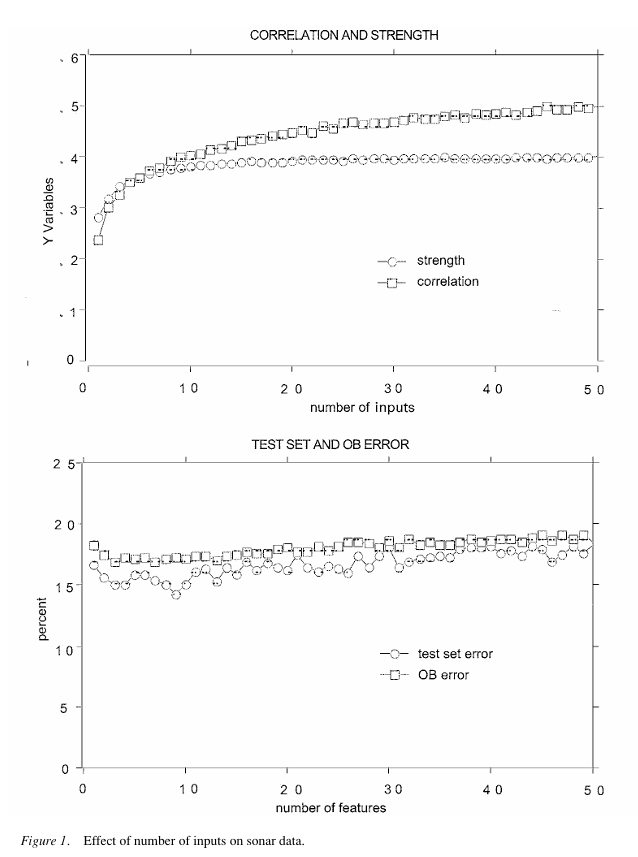

작은 데이터셋인 sonar 데이터에서는 F가 4,5개 넘어가자 강점은 일정하게
유지되고 상관관계만 꾸준히 증가하였다. 그 결과 오류율이 꾸준히 증가하였다. 최적의 F는 4~8개 사이일 때 나타나였다.

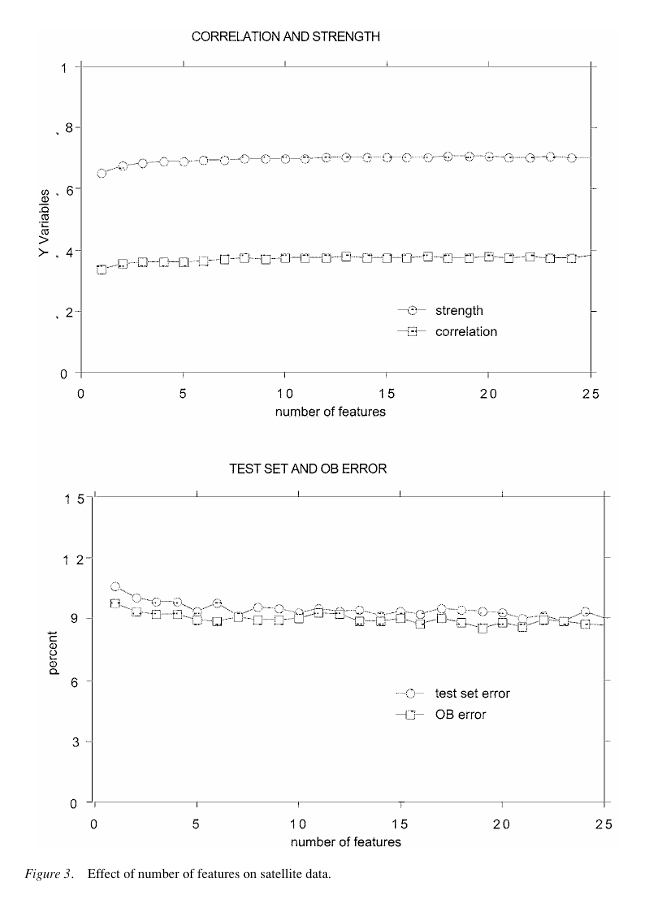

큰 데이터 셋은 satellite 데이터에서는 F값을 늘릴 때 상관관계와 강점이 꾸준히 조금씩 증가하였다. 결과적으로 오류값은 조금씩 감소하는 양상을 띄었다.
이 차이는 데이터의 크기에 따라 강점에 도달하는 시점이 다른 것에서 나온것이며, 데이터가 클수록 F값을 크게 늘리는 것이 도움이된다.

출력 노이즈란 훈련 데이터의 정답을 일부러 잘못 기입된 경우를 말한다. 이런 출력 노이즈에 강한 모델일 수록 더 현실적이고 안정적인 모델로 볼 수 있다.
저자는 훈련 데이터에서 5%의 정답 데이터를 오답 데이터로 일부로 바꾸고, 성능이 얼마나 떨어지는지 실험하였다. 그 결과 랜덤 포레스트는 거의 성능의 변화가 있지 않았다. 이는 그 당시 트리기반의 방법 중 주요 사용되던 에이다부스트(Adaboost)에 비해 현저히 좋은 성능을 보이는 것이였다.

다음으로는 아주 많은 약한 변수를 가지는 데이터를 분석할 때 랜덤 포레스트가 어떻게 작동하는지 확인해본다. 일반적인 단일 의사결정나무 모델로는 이런 경우 좋은 성능을 내기 어렵다. 실험에 사용된 데이터는 입력변수 1000개, 정답10개, 훈련데이터 1000개, 데스트 데이터 수 4000개로 구성되어 있다. 이 데이터를 Forest-RI를 사용하여 분석하였다. F가 1일 때는 매우 느리게 작동되었지만 꾸준히 성능이 향상되었다. F를 점차 늘려서 25까지 도달하였을 때는 개별 나무의 성능이 좋아지면서 전체 성능이 크게 향상되었다. 따라서 랜덤 포레스트는 변수가 많고 개별 변수의 정보량이 적은 데이터에서도 좋은 성능을 보이며 F값의 최적점은 훨씬 높은 곳에 있다.

지금까지의 랜덤 포레스트는 얼마나 예측을 잘하는 지 확인해보았다. 하지만 랜덤 포레스트로 어떤 변수가 가장 중요한 역할을 하였는지 확인하는 것도 가능한다. 이러한 랜덤 포레스트의 매커니즘의 핵심 아이디어는 중요한 변수를 망가 뜨렸을 때, 모델의 성능 저하를 확인해 보는 것이다. 먼저 훈련이 끝난 모델에 OOB데이터를 넣어 전체 OOB데이터 오류율을 계산한다. 그리고 OOB데이터에서 하나의 변수 값들을 무작위로 뒤섞는다. 그 후 다시 OOB오류율을 계산하였을 때 새로운 오류율과 기존의 오류율을 비교한다. 오류율이 크게 증가하였으면 그 변수는 매우 중요한 변수임을 의미한다. 이러한 과정을 모든 변수에 반복 한 후 각 변수의 중요도를 확인한다.

랜덤 포레스트의 아이디어를 회귀 문제, 즉 특정 숫자를 예측하는데 어떻게 사용되는지 확인해볼 수 있다. 회귀 포레스트는 다수결 투표방식이 아닌 숲에 있는 모든 나무들이 예측한 숫자들을 단순히 평균 내서 최종 예측값을 만든다. 회귀 포레스트의 전체 오류 (MSE)에 대한 공식은 다음과 같다.

 $$포레스트의 오류 ≤ (잔차들의 평균 상관관계) * (개별 나무의 평균 오류)$$

포레스트의 오류는 최종적으로 줄이고 싶은, 숲 전체의 평균 제곱 오차(MSE)다. 개별 나무의 평균 오류는 숲에 있는 나무 한그루 한그루의 평균적인 MSE다. 이 값이 낮을수록 개별 나무가 똑똑함을 의미한다. 잔차들의 평균 상관관계는 실제값과 예측값의 차, 즉 모델이 얼마나 틀렸는지 설명하는 오차들이 얼마나 비슷한 경향을 보이는지 확인하는 것이다.

이러란 회귀 포레스트를 배깅 및 적응형 배깅과 비교하여 성능을 분석해보았을 때 항상 회귀 포레스트가 배깅보다 성능이 좋았고, 적응형 배깅과는 혼합적인 결과를 보였다. 그리고 회귀 문제에서는 F값을 늘려도 오차 상관관계가 천천히 증가함을 보였고 따라서 상대적으로 더 높은 F값을 사용하는 것이 적잘하다는 것을 발견하였다. 또다른 실험상황에 배깅 대신 다른 무작위성을 주입하여보았을 때에도 좋은 성능을 보였기 때문에 랜덤 포레스트의 프레임워크가 유연함을 알 수 있다.

결론적으로 랜덤 포레스트는 효과적이고 과적합되지 않는 좋은 모델이다.
또한 포레스트 계열 알고리즘은 부스팅 계열 알고리즘의 정확도를 따라갈 수 없다는 기존의 통념을 깨고 높은 정확도를 보여주었다. 하지만 랜덤 포레스트가 부스팅과 비슷한 성능을 낸다는 것은 편향을 자체적으로 줄이고 있다는 것인데 그 매커니즘이 무엇인지 명확하게 알 수없다. (이는 지난 20여 년간의 후속 연구를 통해 원리가 규명되었다.)

---
## **논문:  Economic Measurement Lost in a Random Forest?  A Case Study of Employment Data(2025)**

이 논문은 정부의 경제 통계 분야 측정에서 머신러닝과 빅데이터가 어떻게 활용될 수 있을지에 대한 질문에서 시작된다. 정부에서 사용하는 고용 통계에는 두가지가있다.

*   QCEW(분기별 고용 및 임금 센서스): 거의 모든 사업장을 조사하여매우 정확하지만, 결과가 나오기까지 6개월이나 걸린다는 단점이 있다.
*   CES(현행 고용 통계):표본 조사 기반으로 한 달 내에 발표가 나지만 정확도가 떨어진다.

이 연구의 목표는 머신러닝을 활용하여 CES의 잠정치를 QCEW의 최종치에 근접하도록 개선할 수 있는지 확인하는 것이다.



연구 방식은 CES와 이를 개선하기 위한 민간 급여 처리업제 데이터를 독립변수로 두고 QCEW를 종속변수로 설정하여 모델들을 비교한다. 연구에 사용되는 모델은 아무런 모델링 없는 CES와 선형 회귀, 라쏘 회귀, 랜덤 포레스트다. 교차검증 방식은 다음과 같다.

*   k-폴드 교차 검증:데이터 전체를 여러 조각으로 나누고, 돌아가면서 훈련과 테스트를 진행하는 방식이다. 검증의 전반적인 성능은 좋지만, 미래의 데이터를 사용하여 과거의 데이터를 예측하는 비현실적은 경우가 존재한다.
*   롤링 단기 예측 교차 검증:과거부터 특정 시점까지의 데이터만으로 훈련하고, 바로 다음 한 달을 예측 하는 방법이다.

이 두가지 방법으로 MAE(평균 절대 오차)와 $1-R^2$을 구하여 성능을 지표화 한다.



연구의 결과에 대한 내용은 아래의 테이블로 정리된다.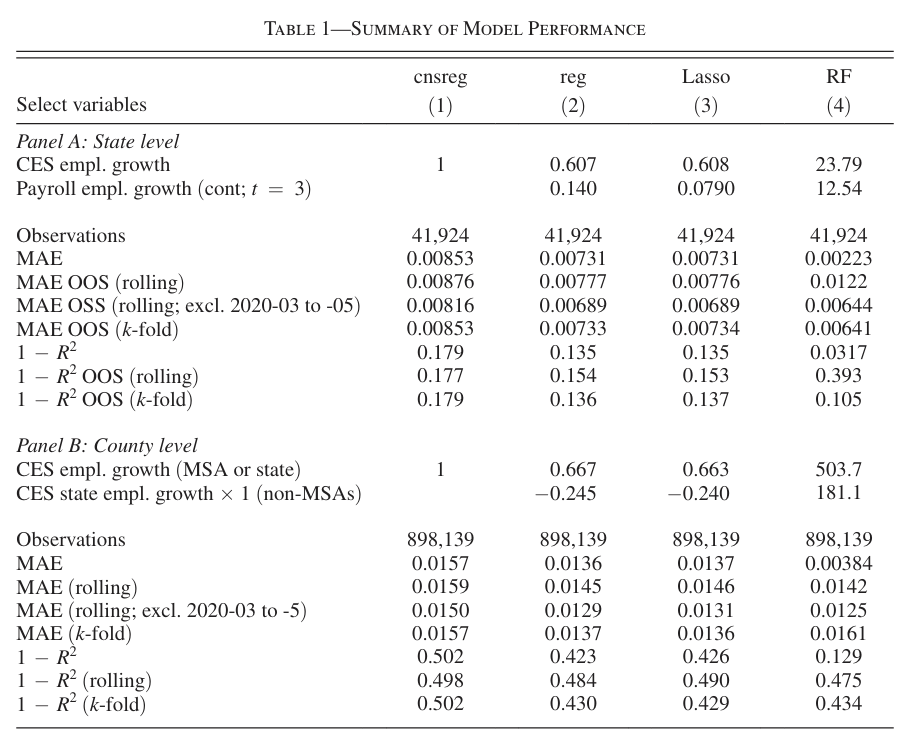

주 단위 분석 결과에서 선형 회귀 라쏘 회귀는 초기 CES값 보다 더 좋은 성능을 보였다. 롤링 교차 방식에서 오차를 약 11% 감소시켰는데 이는 빅데이터(급여 데이터)를 전통적인 방식에 결합하는 것으로도 의미있는 개선이 가능함을 시사한다. K-폴드 교차 검증에서 랜덤 포레스트는 압도적인 성능을 보여주었다. 하지만 롤링 교차 방식에서 랜덤 포레스트는 반대로 최악의 성을 보여주었다. 저자들은 이러한 원인을 랜덤 포레스트가 외삽,즉 훈련 데이터의 범위를 완전히 벗어나는 값을 예측하는 능력이 부족하기 때문이라고 분석한다.

반면 카운티 단위 분석 결과에서는 롤링 교차 검증 방식에서도 랜덤 포레스트가 선형 회귀보다 약간 더 좋은 성능을 보여주었다. 저자들은 이러한 상반된 결과를 카운티의 표본의 수가 주보다 더 많아 랜덤 포레스트가 더 많은 변동성을 학습했기 때문이. 이는 데이터를 어떤 단위로 집계하느냐에 따라서도 최적의 모델이 달라진다는 것을 시사한다.

---
참고문헌
* Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.
* Dunn, A., English, E., Hood, K., Mason, L., & Quistorff, B. (2025, May). Economic Measurement Lost in a Random Forest? A Case Study of Employment Data. In AEA Papers and Proceedings (Vol. 115, pp. 68-72). 2014 Broadway, Suite 305, Nashville, TN 37203: American Economic Association.